<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/X_ray_median_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: 특히 salt-and-pepper 노이즈에 강한 Median 필터를 적용해 이미지 노이즈 제거.**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io


In [ ]:
# 원본 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/X-ray/X-ray 이미지/normal_10.jpg'
xray_image = io.imread(image_path, as_gray=True)

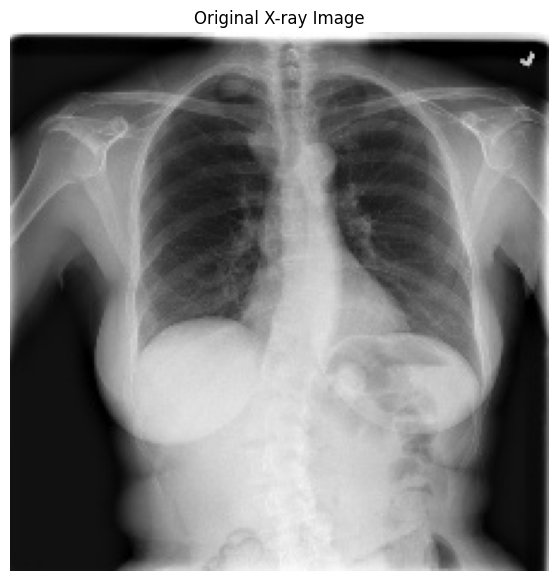

In [ ]:
# 원본 이미지시각화

plt.figure(figsize=(7, 7))
plt.imshow(xray_image, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')
plt.show()

In [ ]:
# 이미지 uint8 형식 변환

xray_image_uint8 = (xray_image * 255).astype('uint8')

In [ ]:
# Median Filtering 적용 (커널 크기: 5)
# Median Filtering은 이미지의 픽셀 값 중 주변 픽셀의 중간값(중앙값)을 선택하여,
# 갑작스러운 노이즈나 작은 점들을 제거한다.

# Gaussian Filtering에 비해 경계가 잘 보존되므로,
# 병변의 경계를 강조하면서 노이즈를 줄이고자 할 때 적합.
# salt-and-pepper 노이즈 제거에 효과적

# 커널의 크기로 필터의 강도를 설정하며, 커널의 크기가 클수록 더 많은 노이즈를 제거하지만,
# 이미지가 부드러워져 이미지 디테일이 흐려질 수 있다.
# 랜덤 노이즈가 많은 경우에는 한계점이 존재하여 Gaussian Filtering에 비해 성능이 떨어질 수 있다.
# Gaussian Filtering에 비해 속도가 느릴 수 있다.

# 커널의 크기는 3,5,7 처럼 홀수여야 한다.

median_image = cv2.medianBlur(xray_image_uint8, 5)

**전처리 전후 이미지 비교**

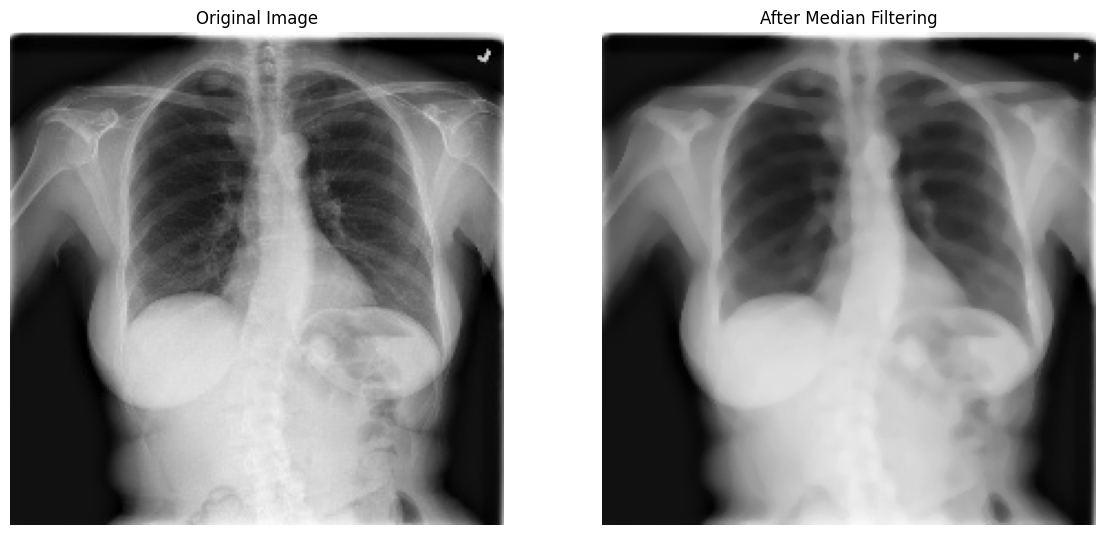

In [ ]:
plt.figure(figsize=(14, 7))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Median Filtering 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(median_image, cmap='gray')
plt.title("After Median Filtering")
plt.axis('off')

plt.show()